In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import json
from json import JSONDecodeError
from collections import Counter
import re

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
llm_columns = ['topic', 'mood', 'target_audience', 'temporal_setting', 'location_setting']

In [4]:
plots_features = pd.read_csv('llm_features.csv')
plots_features

,movie_wikipedia_id,movie_freebase_id,movie_name,release_year,revenue,runtime,languages,countries,genres,plot_summary,...,char_count,avg_word_length,sentence_count,lexical_diversity,sentiment_polarity,topic,mood,target_audience,temporal_setting,location_setting
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th...",...,2181,6.109244,15,0.627451,-0.085095,"['Science Fiction', 'Horror']","['Dark', 'Dramatic']",['Adults'],['Future'],['Fictional']
1,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...,...,3301,5.594915,36,0.542373,0.035867,"['Mystery', 'Drama']",['Dark'],['Adults'],['Modern'],['Real']
2,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra...",...,2339,5.490610,24,0.582160,0.133259,['Drama'],['Dark'],['Adults'],['Modern'],['Real']
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","Every hundred years, the evil Morgana returns...",...,870,5.337423,7,0.631902,0.040568,"['Fantasy', 'Adventure']",['Inspirational'],['Children'],['Past'],['Fictional']
4,6631279,/m/0gffwj,Little city,1997,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","Adam, a San Francisco-based artist who works a...",...,1234,5.484444,9,0.626667,0.165202,"['Romance', 'Drama']","['Romantic', 'Dramatic']",['Adults'],['Modern'],['Real']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25565,26482675,/m/0bbwngb,Eşrefpaşalılar,2010,1847671.0,NaN,NaN,NaN,"{""/m/05p553"": ""Comedy film"", ""/m/07s9rl0"": ""Dr...","The film is about two friends, Tayyar , a mafi...",...,601,5.564815,4,0.731481,0.258333,"['Romance', 'Drama', 'Conflict']",['Dramatic'],['Adults'],['Modern'],['Real']
25566,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",Two former National Oceanic Atmospheric Admini...,...,664,6.384615,5,0.759615,0.108333,"['Mystery', 'Science Fiction']",['Dark'],['Adults'],['Modern'],['Real']
25567,34980460,/m/0g4pl34,Knuckle,2011,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",{{No plot}} This film follows 12 years in the ...,...,368,5.750000,3,0.781250,0.010000,"['Conflict', 'Drama']",['Dramatic'],['Adults'],['Modern'],['Real']
25568,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...","The story takes place in the year 2092,The Sup...",...,1237,6.216080,8,0.713568,0.194003,"['Science Fiction', 'Adventure']","['Exciting', 'Fantastical']",['Adults'],['Future'],['Fictional']


In [5]:
plots_features[llm_columns].isna().any(axis=1).sum()

1

In [6]:
relabeled = pd.read_csv('rows_relabeled.csv')
relabeled_ids = set(relabeled["movie_freebase_id"])
relabeled.isna().any(axis=1).sum()

0

In [7]:
for column in relabeled:
    plots_features.loc[
        plots_features['movie_freebase_id'].isin(relabeled_ids), 
        column
    ] = relabeled[column]

In [8]:
plots_features.columns

Index(['movie_wikipedia_id', 'movie_freebase_id', 'movie_name', 'release_year',
       'revenue', 'runtime', 'languages', 'countries', 'genres',
       'plot_summary', 'language', 'word_count', 'char_count',
       'avg_word_length', 'sentence_count', 'lexical_diversity',
       'sentiment_polarity', 'topic', 'mood', 'target_audience',
       'temporal_setting', 'location_setting'],
      dtype='object')

In [9]:
plots_features[llm_columns].isna().any(axis=1).sum()

1

Let's look at numerical plot features

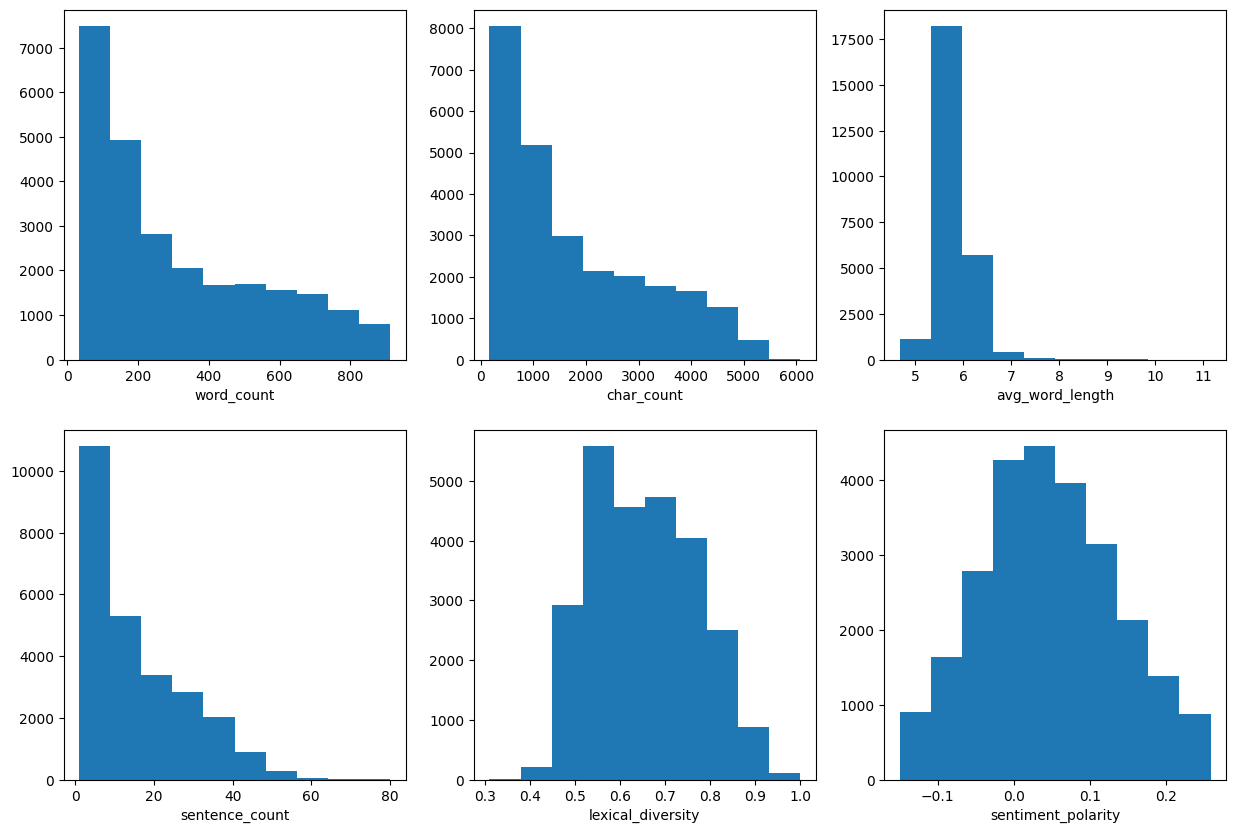

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

numerical_plot_features = [
    'word_count', 'char_count', 'avg_word_length', 
    'sentence_count', 'lexical_diversity', 'sentiment_polarity']

for i, column in enumerate(numerical_plot_features):
    axs[i].hist(plots_features[column])
    axs[i].set_xlabel(column)

# Adjust layout to prevent overlap
# plt.tight_layout()

In [11]:
# There are no missed values for these features
plots_features[numerical_plot_features].isna().any(axis=1).sum()

0

Now let's look at plot features produced by LLM

In [12]:
llm_columns = ['topic', 'mood', 'target_audience', 'temporal_setting', 'location_setting']
plots_features[llm_columns].head()

,topic,mood,target_audience,temporal_setting,location_setting
0,"['Science Fiction', 'Horror']","['Dark', 'Dramatic']",['Adults'],['Future'],['Fictional']
1,"['Mystery', 'Drama']",['Dark'],['Adults'],['Modern'],['Real']
2,['Drama'],['Dark'],['Adults'],['Modern'],['Real']
3,"['Fantasy', 'Adventure']",['Inspirational'],['Children'],['Past'],['Fictional']
4,"['Romance', 'Drama']","['Romantic', 'Dramatic']",['Adults'],['Modern'],['Real']


In [13]:
plots_features[llm_columns].isna().any(axis=1).sum()

1

In [14]:
plots_features[plots_features[llm_columns].isna().any(axis=1)]

,movie_wikipedia_id,movie_freebase_id,movie_name,release_year,revenue,runtime,languages,countries,genres,plot_summary,...,char_count,avg_word_length,sentence_count,lexical_diversity,sentiment_polarity,topic,mood,target_audience,temporal_setting,location_setting
13240,751724,/m/0389gk,I Spit On Your Grave,1978,NaN,101.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01q03"": ""Cult"", ""/m/03npn"": ""Horror"", ""/m...",New York short story writer Jennifer Hills ren...,...,3689,5.649311,36,0.493109,0.014877,NaN,NaN,NaN,NaN,NaN


There is only one row with missed values, so let's just drop it.

In [15]:
llm_notna_features_mask = ~plots_features[llm_columns].isna().any(axis=1)
plots_features = plots_features[llm_notna_features_mask]

In [16]:
def parse_llm_json(string):
    string = string.replace("'", "\"")
    string = string.replace('" "', '", "') # there are few examples without commas
    return json.loads(string)

In [17]:
def clean_strings(list_of_strings):
    # list_of_strings = [re.sub(r'[^a-zA-Z]', '', x) for x in list_of_strings]
    list_of_strings = [x.replace('.', '') for x in list_of_strings]
    list_of_strings = [x.lower() for x in list_of_strings]
    list_of_strings = [x.translate(str.maketrans('', '', '0123456789')) for x in list_of_strings]
    return list_of_strings

In [18]:
plots_features[llm_columns] = plots_features[llm_columns].map(parse_llm_json)

In [19]:
plots_features[llm_columns] = plots_features[llm_columns].map(clean_strings)

In [20]:
plots_features['target_audience'] = plots_features['target_audience'].apply(
    lambda x: [y if y != 'adult' else 'adults' for y in x])
plots_features['target_audience'] = plots_features['target_audience'].apply(
    lambda x: [y if y != 'family' else 'families' for y in x])
plots_features['temporal_setting'] = plots_features['temporal_setting'].apply(
    lambda x: [y if 'histor' not in y else 'past' for y in x])

In [21]:
plots_features[llm_columns].map(len).describe()

,topic,mood,target_audience,temporal_setting,location_setting
count,25569.000000,25569.000000,25569.000000,25569.000000,25569.000000
mean,2.261449,1.495757,1.000313,1.000117,1.000078
std,0.726025,0.567412,0.017686,0.010831,0.012508
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,2.000000,1.000000,1.000000,1.000000
max,6.000000,4.000000,2.000000,2.000000,2.000000


In [22]:
for column in plots_features[llm_columns].columns:
    print(column)
    print(Counter(y for x in plots_features[column].values for y in x))
    print()

topic
Counter({'drama': 17735, 'romance': 6912, 'comedy': 5209, 'mystery': 4309, 'adventure': 4154, 'conflict': 3591, 'action': 3283, 'tragedy': 2477, 'horror': 2282, 'historical': 1645, 'fantasy': 1611, 'science fiction': 1095, 'thriller': 1027, 'crime': 513, 'family': 260, 'documentary': 170, 'inspirational': 143, 'war': 124, 'revenge': 122, 'friendship': 100, 'dark': 86, 'sports': 82, 'western': 73, 'biography': 72, 'psychological': 44, 'music': 42, 'suspense': 41, 'coming of age': 36, 'sci-fi': 34, 'political': 33, 'coming-of-age': 31, 'supernatural': 28, 'betrayal': 22, 'musical': 15, 'survival': 13, 'redemption': 13, 'satire': 12, 'identity': 10, 'heist': 10, 'espionage': 8, 'social issues': 8, 'cultural': 7, 'biographical': 7, 'romantic': 7, 'history': 6, 'disaster': 6, 'sport': 6, 'social commentary': 6, 'teenagers': 6, 'relationships': 5, 'struggle': 5, 'family conflict': 5, 'martial arts': 5, 'resilience': 4, 'competition': 4, 'none': 4, 'inspiration': 4, 'legal': 4, 'adult':

In [23]:
allowed_topics = {"romance", "conflict", "adventure", "mystery",
                                    "comedy", "tragedy", "fantasy", "science fiction", "horror", 
                                    "drama", "action", "historical"}
topic_bad_mask = plots_features['topic'].apply(set).apply(lambda x: len(x - allowed_topics)).astype(bool)
plots_features['topic'][topic_bad_mask]

23                  [historical, documentary]
30                [romance, drama, political]
40                   [drama, crime, suspense]
41                         [horror, thriller]
43                          [drama, thriller]
                         ...                 
25545    [mystery, science fiction, thriller]
25548                [drama, family, tragedy]
25550                          [drama, urban]
25562              [mystery, drama, thriller]
25563      [mystery, horror, drama, thriller]
Name: topic, Length: 3092, dtype: object

In [24]:
topic_mask_to_relabel = plots_features['topic'].apply(
    lambda x: [y for y in x if y in allowed_topics]).apply(lambda x: len(x)==0)
topic_mask_to_relabel.sum()

173

In [25]:
allowed_moods = {"exciting", "dark", "lighthearted", "romantic",
                                "inspirational", "dramatic", "fantastical"}
mood_bad_mask = plots_features['mood'].apply(set).apply(lambda x: len(x - allowed_moods)).astype(bool)
plots_features['mood'][mood_bad_mask]

16                          [drama]
40               [dramatic, tragic]
52                [dark, emotional]
67                  [dark, tragedy]
155      [inspirational, emotional]
                    ...            
25475                      [comedy]
25477                    [thriller]
25545             [dramatic, tense]
25550                [dark, tragic]
25555                [dark, tragic]
Name: mood, Length: 1249, dtype: object

In [26]:
mood_mask_to_relabel = plots_features['mood'].apply(
    lambda x: [y for y in x if y in allowed_moods]).apply(lambda x: len(x)==0)
mood_mask_to_relabel.sum()

502

In [27]:
allowed_audience = {"children", "teenagers", "adults", "families", "elderly"}
audience_bad_mask = plots_features['target_audience'].apply(set).apply(
    lambda x: len(x - allowed_audience)).astype(bool)
plots_features['target_audience'][audience_bad_mask]

2844        [teens]
4085        [drama]
4641     [all ages]
4642     [all ages]
15766     [adults,]
17888         [n/a]
22208       [teens]
24175    [romantic]
24581        [none]
25032        [none]
Name: target_audience, dtype: object

In [28]:
allowed_temporal_setting = {"past", "modern", "future"}
setting_bad_mask = plots_features['temporal_setting'].apply(set).apply(
    lambda x: len(x - allowed_temporal_setting)).astype(bool)
plots_features['temporal_setting'][setting_bad_mask]

120      [fictional]
142      [fictional]
182      [fictional]
345      [fictional]
491      [fictional]
            ...     
25383    [fictional]
25411    [fictional]
25437    [fictional]
25483    [fictional]
25547            [-]
Name: temporal_setting, Length: 659, dtype: object

In [29]:
allowed_location_setting = {"real", "fictional"}
location_bad_mask = plots_features['location_setting'].apply(set).apply(
    lambda x: len(x - allowed_location_setting)).astype(bool)
plots_features['location_setting'][location_bad_mask]

2396                  [past]
6151                [modern]
7406               [fantasy]
8400                [modern]
9171               [fantasy]
11596               [modern]
13521              [fantasy]
14410               [modern]
14413               [modern]
16035               [modern]
16037               [future]
16112                 [past]
16326                 [past]
16546          [fantastical]
16656               [modern]
18318                  [n/a]
19315              [fantasy]
19491               [modern]
20690               [future]
23061               [modern]
24581                 [none]
24610    [parallel universe]
24612     [falkland islands]
24817               [modern]
25032                 [none]
Name: location_setting, dtype: object

In [30]:
subset_for_relabel = plots_features[
    topic_mask_to_relabel | mood_mask_to_relabel | audience_bad_mask | setting_bad_mask | location_bad_mask]
# subset_for_relabel[['movie_freebase_id'] + llm_columns].to_csv('rows_for_relabel.csv', index=None)

In [31]:
len(subset_for_relabel)

1301

# Exclude unauthorized classes

In [32]:
plots_features['topic'] = plots_features['topic'].apply(
    lambda x: [y for y in x if y in allowed_topics])

plots_features['mood'] = plots_features['mood'].apply(
    lambda x: [y for y in x if y in allowed_moods])

plots_features['target_audience'] = plots_features['target_audience'].apply(
    lambda x: [y for y in x if y in allowed_audience])

plots_features['temporal_setting'] = plots_features['temporal_setting'].apply(
    lambda x: [y for y in x if y in allowed_temporal_setting])

plots_features['location_setting'] = plots_features['location_setting'].apply(
    lambda x: [y for y in x if y in allowed_location_setting])

In [33]:
for column in plots_features[llm_columns].columns:
    print(column)
    print(Counter(y for x in plots_features[column].values for y in x))
    print()

topic
Counter({'drama': 17735, 'romance': 6912, 'comedy': 5209, 'mystery': 4309, 'adventure': 4154, 'conflict': 3591, 'action': 3283, 'tragedy': 2477, 'horror': 2282, 'historical': 1645, 'fantasy': 1611, 'science fiction': 1095})

mood
Counter({'dramatic': 13083, 'dark': 10059, 'lighthearted': 5148, 'exciting': 3016, 'inspirational': 2917, 'romantic': 2235, 'fantastical': 421})

target_audience
Counter({'adults': 20090, 'families': 2144, 'teenagers': 2065, 'children': 1252, 'elderly': 16})

temporal_setting
Counter({'modern': 16977, 'past': 7371, 'future': 564})

location_setting
Counter({'real': 20570, 'fictional': 4976})



In [52]:
plots_features[llm_columns] = plots_features[llm_columns].map(json.dumps)

In [53]:
plots_features.to_csv('llm_features_fixed.csv', index=None)

In [57]:
pd.read_csv('llm_features_fixed.csv')

,movie_wikipedia_id,movie_freebase_id,movie_name,release_year,revenue,runtime,languages,countries,genres,plot_summary,...,char_count,avg_word_length,sentence_count,lexical_diversity,sentiment_polarity,topic,mood,target_audience,temporal_setting,location_setting
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th...",...,2181,6.109244,15,0.627451,-0.085095,"[""science fiction"", ""horror""]","[""dark"", ""dramatic""]","[""adults""]","[""future""]","[""fictional""]"
1,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...,...,3301,5.594915,36,0.542373,0.035867,"[""mystery"", ""drama""]","[""dark""]","[""adults""]","[""modern""]","[""real""]"
2,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra...",...,2339,5.490610,24,0.582160,0.133259,"[""drama""]","[""dark""]","[""adults""]","[""modern""]","[""real""]"
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","Every hundred years, the evil Morgana returns...",...,870,5.337423,7,0.631902,0.040568,"[""fantasy"", ""adventure""]","[""inspirational""]","[""children""]","[""past""]","[""fictional""]"
4,6631279,/m/0gffwj,Little city,1997,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","Adam, a San Francisco-based artist who works a...",...,1234,5.484444,9,0.626667,0.165202,"[""romance"", ""drama""]","[""romantic"", ""dramatic""]","[""adults""]","[""modern""]","[""real""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25564,26482675,/m/0bbwngb,Eşrefpaşalılar,2010,1847671.0,NaN,NaN,NaN,"{""/m/05p553"": ""Comedy film"", ""/m/07s9rl0"": ""Dr...","The film is about two friends, Tayyar , a mafi...",...,601,5.564815,4,0.731481,0.258333,"[""romance"", ""drama"", ""conflict""]","[""dramatic""]","[""adults""]","[""modern""]","[""real""]"
25565,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",Two former National Oceanic Atmospheric Admini...,...,664,6.384615,5,0.759615,0.108333,"[""mystery"", ""science fiction""]","[""dark""]","[""adults""]","[""modern""]","[""real""]"
25566,34980460,/m/0g4pl34,Knuckle,2011,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",{{No plot}} This film follows 12 years in the ...,...,368,5.750000,3,0.781250,0.010000,"[""conflict"", ""drama""]","[""dramatic""]","[""adults""]","[""modern""]","[""real""]"
25567,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...","The story takes place in the year 2092,The Sup...",...,1237,6.216080,8,0.713568,0.194003,"[""science fiction"", ""adventure""]","[""exciting"", ""fantastical""]","[""adults""]","[""future""]","[""fictional""]"
